In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mat73
import h5py


# Estimation Plot

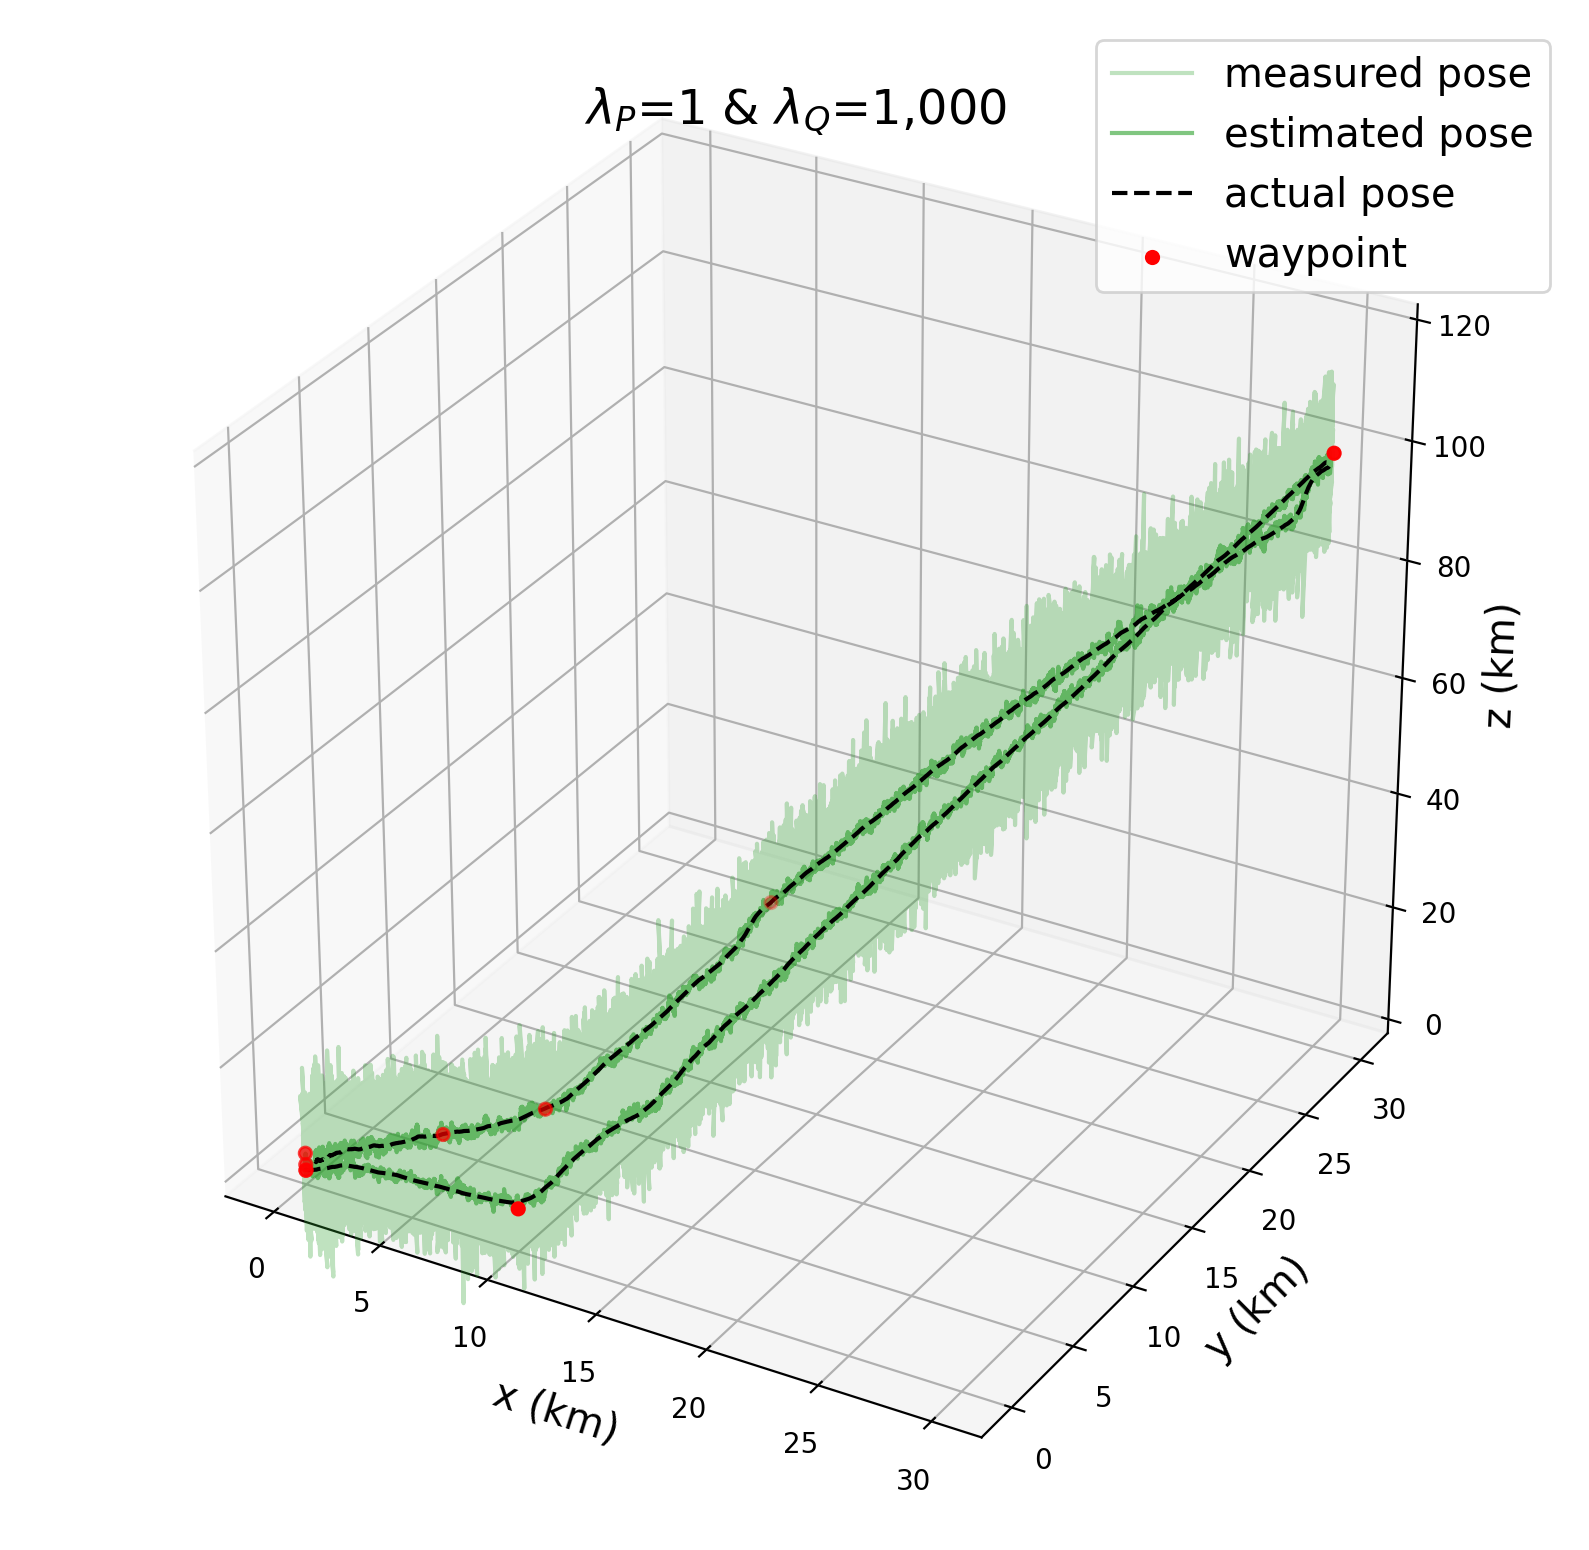

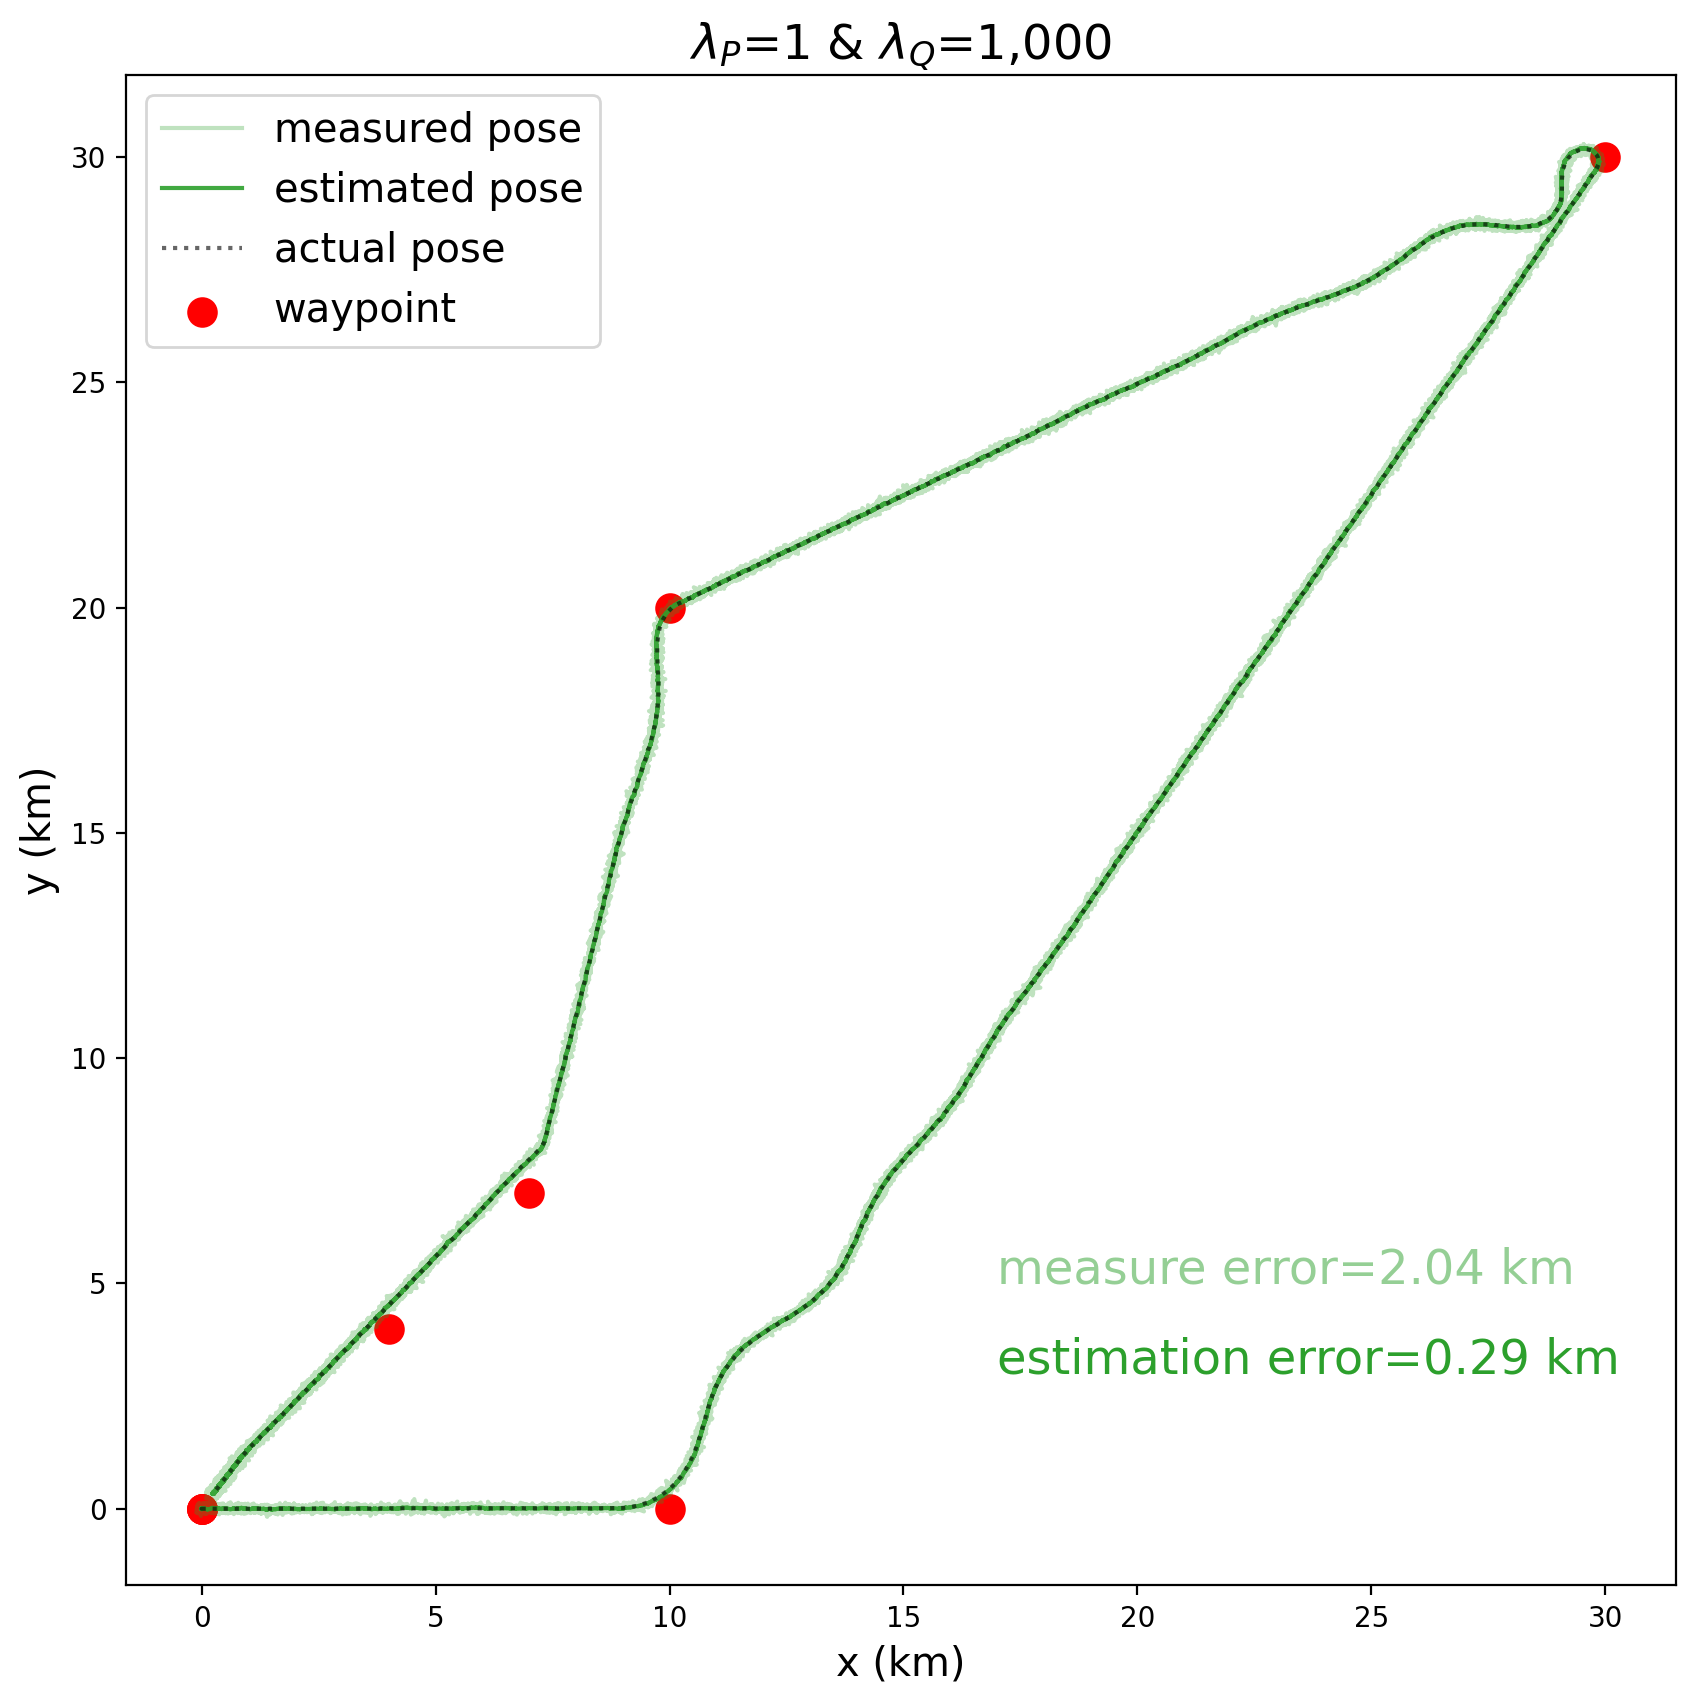

In [72]:
#%matplotlib notebook
%matplotlib inline
colors = ['tab:blue','tab:orange','tab:green','tab:purple']
filenames = ['P1_Q10','P1_Q100','P1_Q1000']
titles = ['$\lambda_P$=1 & $\lambda_Q$=10','$\lambda_P$=1 & $\lambda_Q$=100','$\lambda_P$=1 & $\lambda_Q$=1,000']
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["figure.dpi"] = 200

fig = plt.figure()
ax = plt.axes(projection='3d')
i = 2
end = -1#-7500
if 1:
    filename_i = "Estimation/"+filenames[i]+"/noisypose.csv"
    data1 = pd.read_csv(filename_i,header=None).to_numpy()[:end]
    data1[:,0] = data1[:,0]/100
    data1[:,1] = data1[:,1]/100
    ax.plot3D(data1[:,0], data1[:,1], data1[:,2], colors[i],alpha=0.3)
    
    filename_i = "Estimation/"+filenames[i]+"/pose.csv"
    data2 = pd.read_csv(filename_i,header=None).to_numpy()[:end]
    data2[:,0] = data2[:,0]/100
    data2[:,1] = data2[:,1]/100
    ax.plot3D(data2[:,0], data2[:,1], data2[:,2], colors[i],alpha=0.6)
    
    filename_i = "Estimation/"+filenames[i]+"/truepose.csv"
    data3 = pd.read_csv(filename_i,header=None).to_numpy()[:end]
    data3[:,0] = data3[:,0]/100
    data3[:,1] = data3[:,1]/100
    ax.plot3D(data3[:,0], data3[:,1], data3[:,2], 'black',ls='--',alpha=1.0)
    
    error13 = np.sqrt(np.average(np.power(data1-data3,2)))
    
    error23 = np.sqrt(np.average(np.power(data2-data3,2)))
    
    ax.scatter([0,0,10,30,10,7,4,0,0],
               [0,0,0,30,20,7,4,0,0],
               [0,1,5,100,20,5,3,3,0],
               [100,100,100,100,100,100,100,100,100],color='red')
    
    ax.legend(['measured pose','estimated pose','actual pose','waypoint'],fontsize='x-large')
    ax.set_xlabel("x (km)",fontsize="x-large")
    ax.set_ylabel("y (km)",fontsize="x-large")
    ax.set_zlabel("z (km)",fontsize="x-large")
    ax.set_title(titles[i],fontsize="xx-large")
    ax.set_zlim([0,120])
    
    
    #ax.view_init(0, 0)
plt.show()

fig = plt.figure()
ax = plt.axes()
if 1:
    filename_i = "Estimation/"+filenames[i]+"/noisypose.csv"
    data1 = pd.read_csv(filename_i,header=None).to_numpy()[:end]
    data1[:,0] = data1[:,0]/100
    data1[:,1] = data1[:,1]/100
    ax.plot(data1[:,0], data1[:,1], colors[i],alpha=0.3)
    
    filename_i = "Estimation/"+filenames[i]+"/pose.csv"
    data2 = pd.read_csv(filename_i,header=None).to_numpy()[:end]
    data2[:,0] = data2[:,0]/100
    data2[:,1] = data2[:,1]/100
    ax.plot(data2[:,0], data2[:,1], colors[i],alpha=0.9)
    
    filename_i = "Estimation/"+filenames[i]+"/truepose.csv"
    data3 = pd.read_csv(filename_i,header=None).to_numpy()[:end]
    data3[:,0] = data3[:,0]/100
    data3[:,1] = data3[:,1]/100
    ax.plot(data3[:,0], data3[:,1], 'black',ls=':',alpha=0.6)
    
    
    
    ax.text(17,5,'measure error='+"{:.2f}".format(error13)+" km",fontsize='xx-large',c=colors[i],alpha=0.5)
    ax.text(17,3,'estimation error='+"{:.2f}".format(error23)+" km",fontsize='xx-large',c=colors[i],alpha=1)
    
    ax.scatter([0,0,10,30,10,7,4,0,0],
               [0,0,0,30,20,7,4,0,0],
               100,color='red')
    
    ax.legend(['measured pose','estimated pose','actual pose','waypoint'],fontsize='x-large')
    
    ax.set_xlabel("x (km)",fontsize="x-large")
    ax.set_ylabel("y (km)",fontsize="x-large")
    
    ax.set_title(titles[i],fontsize="xx-large")


# D gain plot

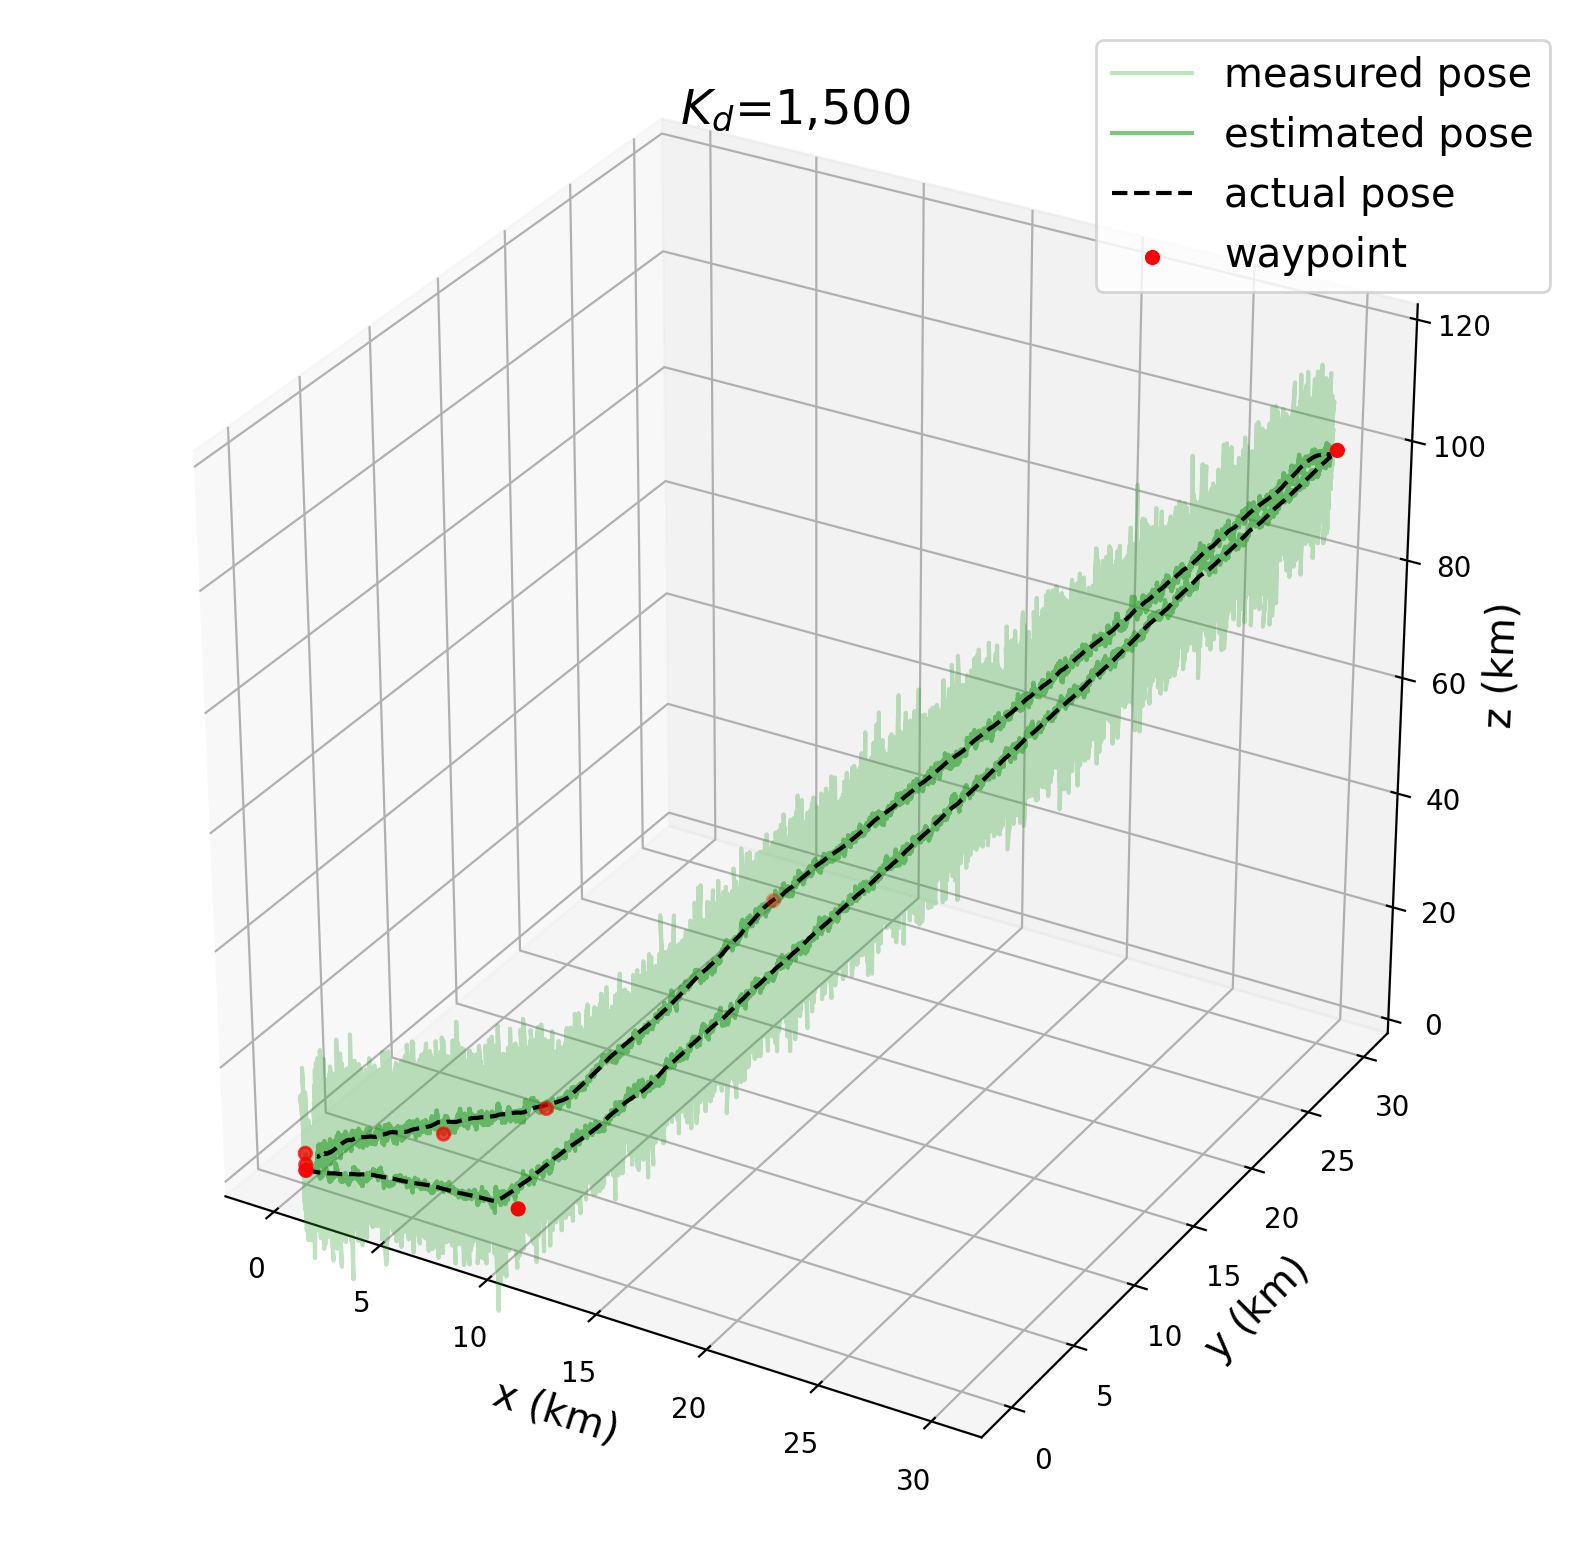

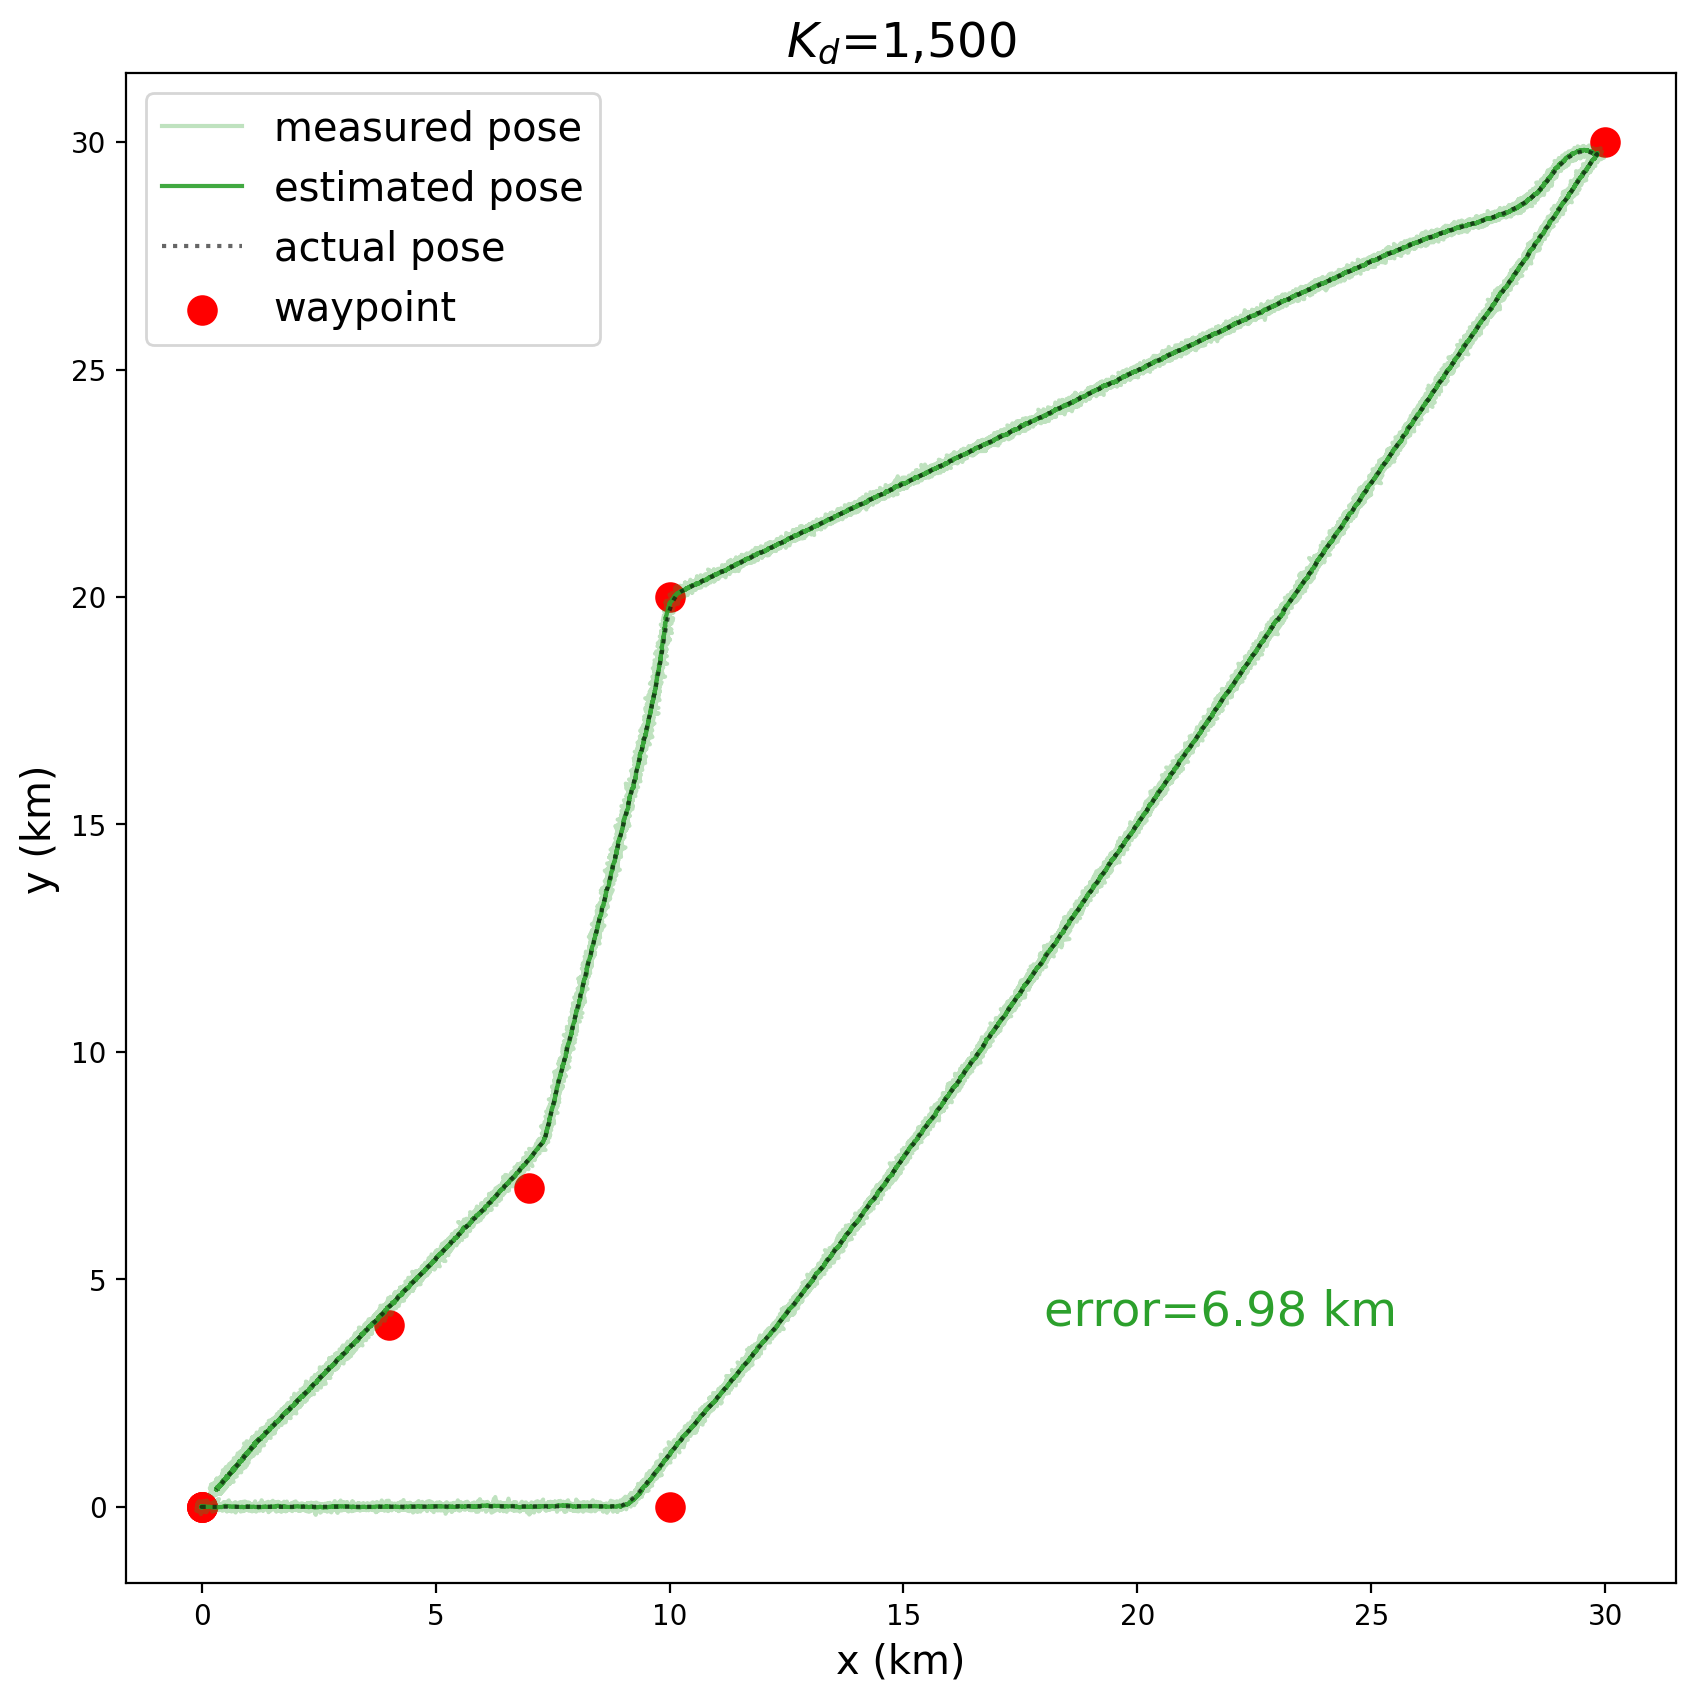

In [101]:
#%matplotlib notebook
%matplotlib inline
colors = ['tab:blue','tab:orange','tab:green','tab:purple']
filenames = ['D05','D10','D15']
titles = ['$K_d$=500','$K_d$=1,000','$K_d$=1,500']
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["figure.dpi"] = 200

fig = plt.figure()
ax = plt.axes(projection='3d')
i = 2
if 1:
    filename_i = "PID_Dgain/"+filenames[i]+"/noisypose.csv"
    data1 = pd.read_csv(filename_i,header=None).to_numpy()
    ax.plot3D(data1[:,0]/100, data1[:,1]/100, data1[:,2], colors[i],alpha=0.3)
    
    filename_i = "PID_Dgain/"+filenames[i]+"/pose.csv"
    data2 = pd.read_csv(filename_i,header=None).to_numpy()
    ax.plot3D(data2[:,0]/100, data2[:,1]/100, data2[:,2], colors[i],alpha=0.6)
    
    filename_i = "PID_Dgain/"+filenames[i]+"/truepose.csv"
    data3 = pd.read_csv(filename_i,header=None).to_numpy()
    ax.plot3D(data3[:,0]/100, data3[:,1]/100, data3[:,2], 'black',ls='--',alpha=1.0)
    
    ax.scatter([0,0,10,30,10,7,4,0,0],
               [0,0,0,30,20,7,4,0,0],
               [0,1,5,100,20,5,3,3,0],
               [100,100,100,100,100,100,100,100,100],color='red')
    
    ax.legend(['measured pose','estimated pose','actual pose','waypoint'],fontsize='x-large')
    ax.set_xlabel("x (km)",fontsize="x-large")
    ax.set_ylabel("y (km)",fontsize="x-large")
    ax.set_zlabel("z (km)",fontsize="x-large")
    ax.set_title(titles[i],fontsize="xx-large")
    ax.set_zlim([0,120])
    
    
    #ax.view_init(20, 5)
plt.show()

fig = plt.figure()
ax = plt.axes()
if 1:
    filename_i = "PID_Dgain/"+filenames[i]+"/noisypose.csv"
    data1 = pd.read_csv(filename_i,header=None).to_numpy()
    data1[:,0] = data1[:,0]/100
    data1[:,1] = data1[:,1]/100
    ax.plot(data1[:,0], data1[:,1], colors[i],alpha=0.3)
    
    filename_i = "PID_Dgain/"+filenames[i]+"/pose.csv"
    data2 = pd.read_csv(filename_i,header=None).to_numpy()
    data2[:,0] = data2[:,0]/100
    data2[:,1] = data2[:,1]/100
    ax.plot(data2[:,0], data2[:,1], colors[i],alpha=0.9)
    
    filename_i = "PID_Dgain/"+filenames[i]+"/truepose.csv"
    data3 = pd.read_csv(filename_i,header=None).to_numpy()
    data3[:,0] = data3[:,0]/100
    data3[:,1] = data3[:,1]/100
    ax.plot(data3[:,0], data3[:,1], 'black',ls=':',alpha=0.6)
    
    Xj = [0,0,10,30,10,7,4,0,0]
    Yj = [0,0,0,30,20,7,4,0,0]
    Zj = [0,1,5,100,20,5,3,3,0]
    dsum = [0,0]
    for t in range(data2.shape[0]):
        dmin = 1e10
        for j in range(8):
            v2 = np.array([Xj[j+1]-Xj[j],Yj[j+1]-Yj[j],Zj[j+1]-Zj[j]]).transpose()
            v1 = np.array([data2[t,0],data2[t,1],data2[t,2]]).transpose()
            d = np.linalg.norm(v1)*np.sin(np.arccos(np.dot(v1,v2)/(1e-6+(np.linalg.norm(v1)*np.linalg.norm(v2)))))
            if (d < dmin):
                dmin = d
        dsum[0] += dmin*dmin
        dsum[1] += 1
        
    error = np.sqrt((dsum[0]/dsum[1]))
    ax.text(18,4,'error='+"{:.2f}".format(error)+" km",fontsize='xx-large',c=colors[i],alpha=1)
    
    ax.scatter([0,0,10,30,10,7,4,0,0],
               [0,0,0,30,20,7,4,0,0],
               100,color='red')
    
    ax.legend(['measured pose','estimated pose','actual pose','waypoint'],fontsize='x-large')
    
    ax.set_xlabel("x (km)",fontsize="x-large")
    ax.set_ylabel("y (km)",fontsize="x-large")
    ax.set_title(titles[i],fontsize="xx-large")


# Look-a-head Guidance

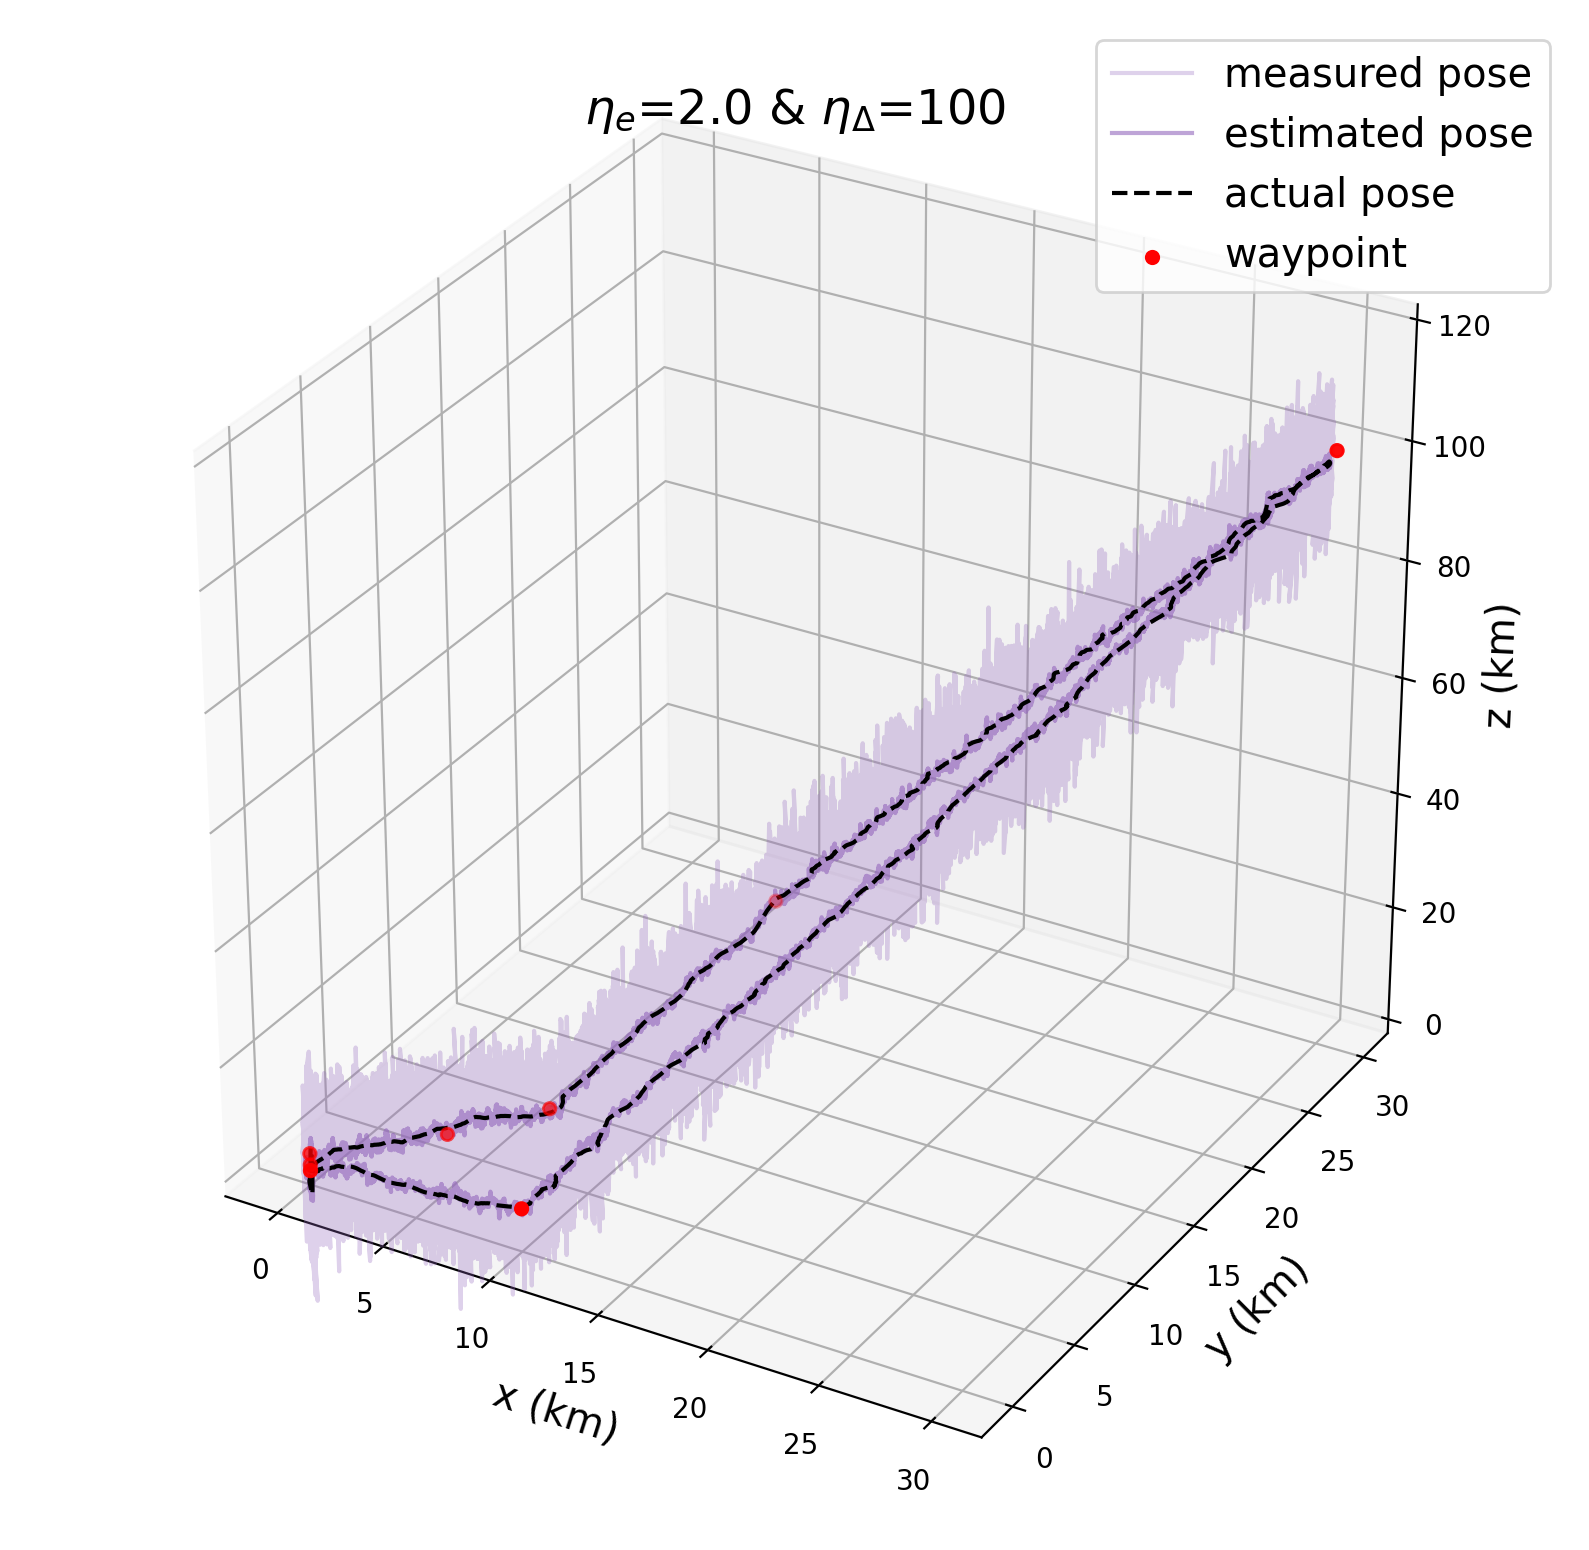

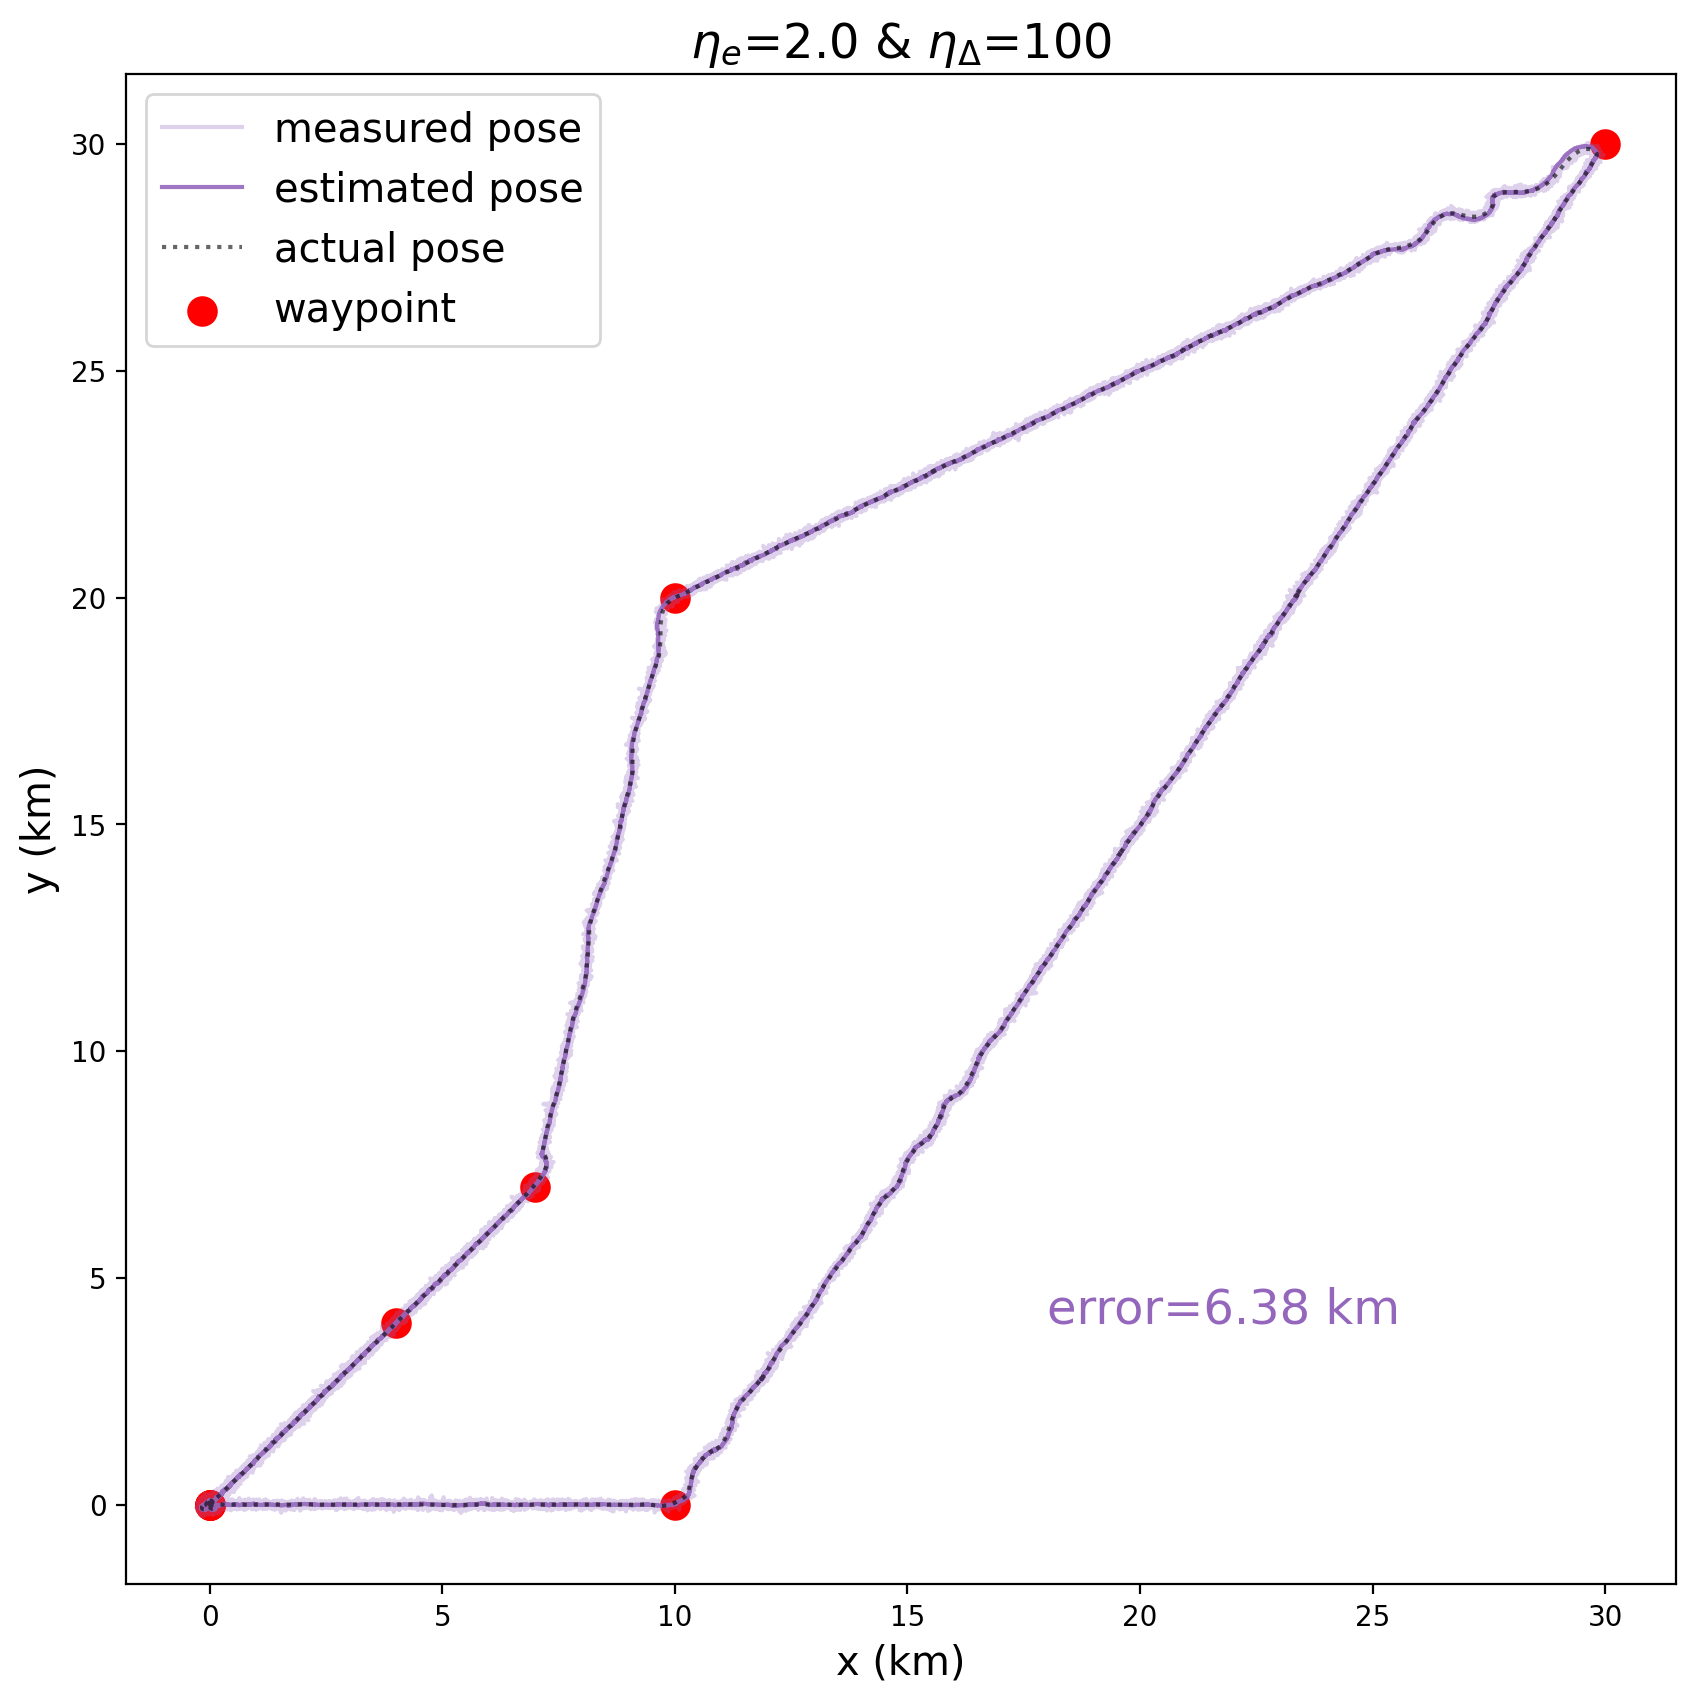

In [98]:
#%matplotlib notebook
%matplotlib inline
colors = ['tab:blue','tab:orange','tab:green','tab:purple']
filenames = ['eta01_eta150','eta01_eta100','eta10_eta100','eta20_eta100']
titles = ['$\eta_e$=0.1 & $\eta_\Delta$=150','$\eta_e$=0.1 & $\eta_\Delta$=100',
          '$\eta_e$=1.0 & $\eta_\Delta$=100','$\eta_e$=2.0 & $\eta_\Delta$=100']
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["figure.dpi"] = 200

fig = plt.figure()
ax = plt.axes(projection='3d')
i = 3
if 1:
    filename_i = "lookahead/"+filenames[i]+"/noisypose.csv"
    data1 = pd.read_csv(filename_i,header=None).to_numpy()
    ax.plot3D(data1[:,0]/100, data1[:,1]/100, data1[:,2], colors[i],alpha=0.3)
    
    filename_i = "lookahead/"+filenames[i]+"/pose.csv"
    data2 = pd.read_csv(filename_i,header=None).to_numpy()
    ax.plot3D(data2[:,0]/100, data2[:,1]/100, data2[:,2], colors[i],alpha=0.6)
    
    filename_i = "lookahead/"+filenames[i]+"/truepose.csv"
    data3 = pd.read_csv(filename_i,header=None).to_numpy()
    ax.plot3D(data3[:,0]/100, data3[:,1]/100, data3[:,2], 'black',ls='--',alpha=1.0)
    
    ax.scatter([0,0,10,30,10,7,4,0,0],
               [0,0,0,30,20,7,4,0,0],
               [0,1,5,100,20,5,3,3,0],
               [100,100,100,100,100,100,100,100,100],color='red')
    
    ax.legend(['measured pose','estimated pose','actual pose','waypoint'],fontsize='x-large')
    ax.set_xlabel("x (km)",fontsize="x-large")
    ax.set_ylabel("y (km)",fontsize="x-large")
    ax.set_zlabel("z (km)",fontsize="x-large")
    ax.set_title(titles[i],fontsize="xx-large")
    ax.set_zlim([0,120])
    
    
    #ax.view_init(20, 5)
plt.show()

fig = plt.figure()
ax = plt.axes()
if 1:
    filename_i = "lookahead/"+filenames[i]+"/noisypose.csv"
    data1 = pd.read_csv(filename_i,header=None).to_numpy()
    data1[:,0] = data1[:,0]/100
    data1[:,1] = data1[:,1]/100
    ax.plot(data1[:,0], data1[:,1], colors[i],alpha=0.3)
    
    filename_i = "lookahead/"+filenames[i]+"/pose.csv"
    data2 = pd.read_csv(filename_i,header=None).to_numpy()
    data2[:,0] = data2[:,0]/100
    data2[:,1] = data2[:,1]/100
    ax.plot(data2[:,0], data2[:,1], colors[i],alpha=0.9)
    
    filename_i = "lookahead/"+filenames[i]+"/truepose.csv"
    data3 = pd.read_csv(filename_i,header=None).to_numpy()
    data3[:,0] = data3[:,0]/100
    data3[:,1] = data3[:,1]/100
    ax.plot(data3[:,0], data3[:,1], 'black',ls=':',alpha=0.6)
    
    Xj = [0,0,10,30,10,7,4,0,0]
    Yj = [0,0,0,30,20,7,4,0,0]
    Zj = [0,1,5,100,20,5,3,3,0]
    dsum = [0,0]
    for t in range(data2.shape[0]):
        dmin = 1e10
        for j in range(8):
            v2 = np.array([Xj[j+1]-Xj[j],Yj[j+1]-Yj[j],Zj[j+1]-Zj[j]]).transpose()
            v1 = np.array([data2[t,0],data2[t,1],data2[t,2]]).transpose()
            d = np.linalg.norm(v1)*np.sin(np.arccos(np.dot(v1,v2)/(1e-6+(np.linalg.norm(v1)*np.linalg.norm(v2)))))
            if (d < dmin):
                dmin = d
        dsum[0] += dmin*dmin
        dsum[1] += 1
        
    error = np.sqrt((dsum[0]/dsum[1]))
    ax.text(18,4,'error='+"{:.2f}".format(error)+" km",fontsize='xx-large',c=colors[i],alpha=1)
    
    ax.scatter([0,0,10,30,10,7,4,0,0],
               [0,0,0,30,20,7,4,0,0],
               100,color='red')
    
    ax.legend(['measured pose','estimated pose','actual pose','waypoint'],fontsize='x-large')
    
    ax.set_xlabel("x (km)",fontsize="x-large")
    ax.set_ylabel("y (km)",fontsize="x-large")
    ax.set_title(titles[i],fontsize="xx-large")